In [93]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


#Variables del sistema
N=1000 #pasos
dt=0.1 #intervalo 
a=1e-6 #radio [m]
eta=0.001 #viscosidad [Ns/m^2]
kb=1.38e-23 #constante de Boltzmann [J/K]
T=300 #temperatura [K]
gamma=6*np.pi*eta*a #parámetro de colisión [mp]
D=kb*T/gamma #difusión
m=1 #masa
gsm = gamma/m #gamma sobre masa

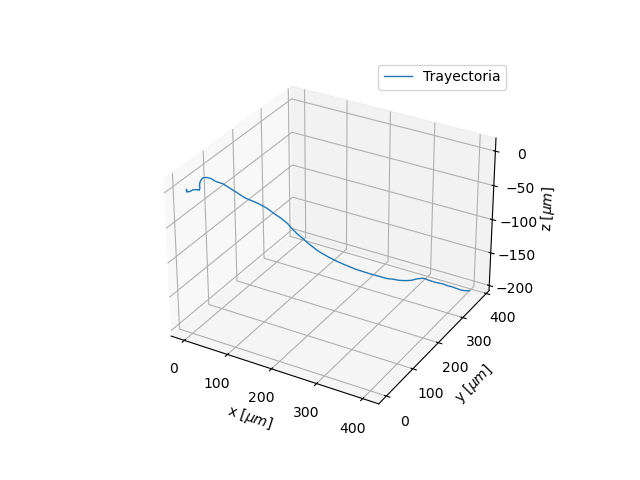

In [95]:
x=np.zeros(N)
y=np.zeros(N)
z=np.zeros(N)

dt=0.1
#Movimiento de la partícula
for i in range(N-2):
    x[i+2]=((2+dt*gsm)*x[i+1]-x[i]+np.sqrt(2*dt*D)*dt*np.random.normal(0, 1))/(1+dt*gsm)
    y[i+2]=((2+dt*gsm)*y[i+1]-y[i]+np.sqrt(2*dt*D)*dt*np.random.normal(0, 1))/(1+dt*gsm)
    z[i+2]=((2+dt*gsm)*z[i+1]-z[i]+np.sqrt(2*dt*D)*dt*np.random.normal(0, 1))/(1+dt*gsm)


# Gráfica
ax = plt.figure().add_subplot(projection="3d")
ax.plot(x*1e6, y*1e6, z*1e6, linewidth=1, label="Trayectoria")
ax.set_xlabel("x [${\mu}m$]")
ax.set_ylabel("y [${\mu}m$]")
ax.set_zlabel("z [${\mu}m$]")
ax.legend()
plt.show()

In [36]:
plt.savefig("brownian_movement.png", bbox_inches="tight", pad_inches=0.3)

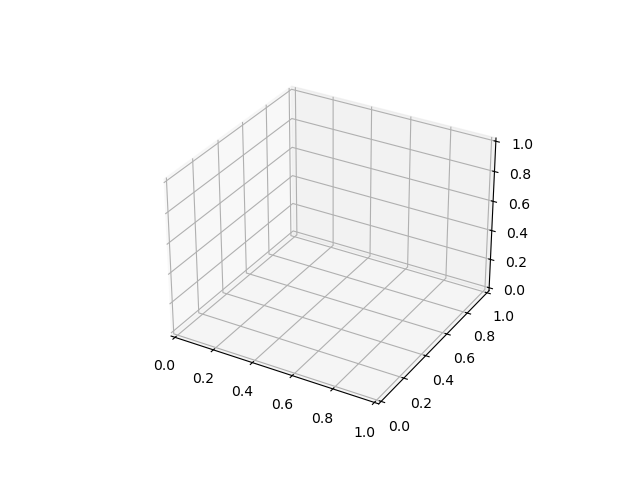

In [97]:
x_anim = []
y_anim = []
z_anim = []

def update(j):
    ax.cla()
    x_anim.append(x[j]*1e6)
    y_anim.append(y[j]*1e6)
    z_anim.append(z[j]*1e6)
    ax.scatter(x[j]*1e6, y[j]*1e6, z[j]*1e6, s=10, marker='o',c='r', label="Posición actual")
    ax.plot(x_anim, y_anim, z_anim, linewidth=1, label="Trayectoria")
    ax.set_xlabel("x [${\mu}m$]")
    ax.set_ylabel("y [${\mu}m$]")
    ax.set_zlabel("z [${\mu}m$]")
    ax.legend()

fig = plt.figure(dpi=100)
ax = fig.add_subplot(projection='3d')
anim = animation.FuncAnimation(fig=fig, func=update, frames=len(x), interval=10*dt, repeat=False)
plt.show()

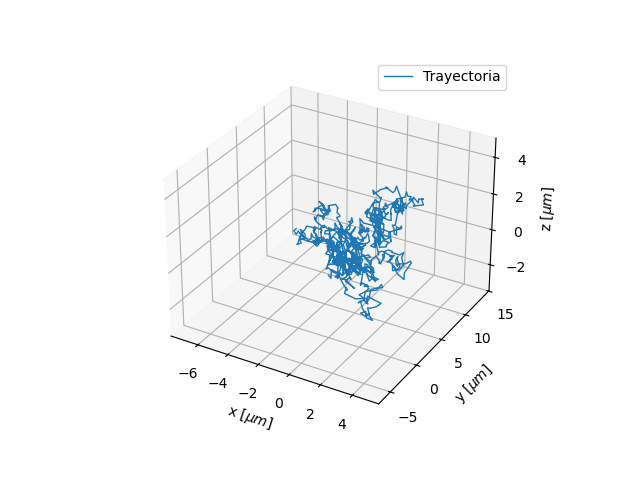

In [104]:
x_2=np.zeros(N)
y_2=np.zeros(N)
z_2=np.zeros(N)

dt=0.1
for i in range(N-1):
    x_2[i+1]=x_2[i]+np.sqrt(2*D*dt)*np.random.normal()
    y_2[i+1]=y_2[i]+np.sqrt(2*D*dt)*np.random.normal()
    z_2[i+1]=z_2[i]+np.sqrt(2*D*dt)*np.random.normal()

# Gráfica
ax = plt.figure().add_subplot(projection="3d")
ax.plot(x_2*1e6, y_2*1e6, z_2*1e6, linewidth=1, label="Trayectoria")
ax.set_xlabel("x [${\mu}m$]")
ax.set_ylabel("y [${\mu}m$]")
ax.set_zlabel("z [${\mu}m$]")
ax.legend()
plt.show()